# Bank Churn Dataset Exploratory Data Analysis 
The goal of the problem at hand is to predict the probability whether a certain user will close their account based on a series of characteristics. By nature, this is a binary classification problem.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from pandas_profiling import phi_coefficient

ModuleNotFoundError: No module named 'pandas_profiling'

In [3]:
training_df = pd.read_csv('training_data.csv')
training_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Missing Values 
As this is a synthetic dataset, we do not need to handle missing values and as we can see in the missing value column counts, there are no missing values across the dataset

In [4]:
num_rows = len(training_df)
print(f"There are {num_rows} data samples in the training set before missing values are handled")

There are 165034 data samples in the training set before missing values are handled


In [5]:
missing_cnts = training_df.isnull().sum()
print(missing_cnts)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Exploring Column Meanings 
To start this exploratory data analysis, I will break down each variables' meaning and 
its related importance to the outcome of the problem. In a separate spreadsheet, I will analyze each variables' meaning looking at the type of variable, a categorization of the variable into a group made by me, the expectation or hypothesis of the importance of the variable, and a conclusion about the variables' importances.


In [6]:
print(training_df.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


From the column names above, I can create a few different categories:
* Personal but non financial related information. 
    * This group can consist of columns such as Surname, Geography, Gender, Age, 
* Bank specific related information
    * This group can consist of columns such as the tenure, balance, num of products, and is active member
* The last grouping can be financial information that is not necessarily directly tied to the bank
    * This group can consist of credit score, has credit card, and the estimated salary 

Exited here is out independent variable and ID and customerID are just ways to identify each customer and SHOULD have no weight on the problem

## Analysis of variables with high impact expectation 
The variables credit score, balance, number of products, and is active member I graded as having a potentially high impact on the outcome of the account. I will analyze the variables relationship to people who keep their account and to people who ultimately close their account.

In [7]:
#split data into people who keep their account and split into people who close their account
bank_accnt_open = training_df[training_df['Exited'] == 0]
bank_accnt_closed = training_df[training_df['Exited'] == 1]


#### Credit Card Score Analysis


In [8]:
open_credit_scores = bank_accnt_open['CreditScore']
close_credit_scores = bank_accnt_closed['CreditScore']

#Renaming my columns because they have the same name
concated_credit_scores = pd.concat([open_credit_scores, close_credit_scores], axis=1)
for i , col in enumerate(concated_credit_scores.columns):
    if i == 0:
        concated_credit_scores.columns.values[i] = f"Open Credit Score"
    if i == 1:
        concated_credit_scores.columns.values[i] = f"Close Credit Score"

concated_credit_scores.describe()


,Open Credit Score,Close Credit Score
count,130113.000000,34921.000000
mean,657.590710,652.220469
std,79.785902,81.136331
min,350.000000,350.000000
25%,599.000000,593.000000
50%,662.000000,651.000000
75%,711.000000,708.000000
max,850.000000,850.000000


##### Conclusion about credit card score
Observing the two box plots and the descriptive statistics immediately above, I overestimated the impact of credit score on bank churn. Both box plots have near identical Q1s, medians, and Q2s. There are even a large portion of credit card scores in the open account section below the 400 mark. From the descriptive statistics, the means and standard deviations are both nearly identical as well. The close standard deviations suggests that the spread and distribution of credit scores across both closed and open are similar. Additionally, the histograms despite the difference in the total amount of accounts kept open vs closed, have the same frequency distribution shape suggesting a light or less than light correlation between credit score and churn probability. Because of the similarity in statistics between the two classes, perhaps Credit card score is not a great predictor. Based on this analyzed data, credit card score would have low impact.

In [9]:
def plot_high_expectation_vars(open_account, close_account, title1, title2, num_bins=25):

    plt.subplot(2, 2, 1)
    sns.histplot(open_account, bins=num_bins)
    plt.title(f"Open {title1} Freqs")

    plt.subplot(2,2,2)
    sns.histplot(close_account, bins=num_bins)
    plt.title(f"Close {title2} Freqs")

    plt.subplot(2,2,3)
    sns.boxplot(open_account, fill=False)
    plt.title(f"Open Account {title1}")

    plt.subplot(2,2,4)
    sns.boxplot(close_account, fill = False)
    plt.title(f"Closed Account {title2}")

    plt.subplots_adjust(hspace=0.6, wspace=0.4)

    plt.show()

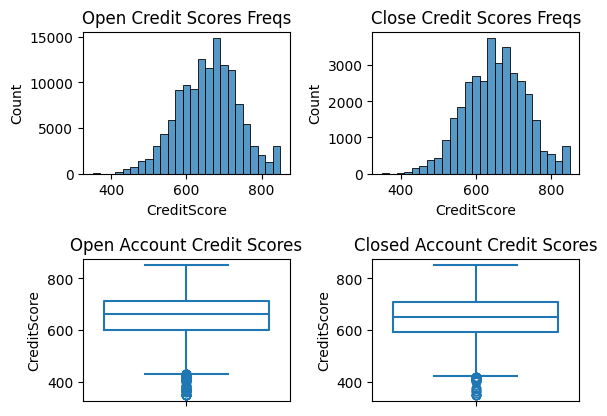

In [10]:
plot_high_expectation_vars(open_credit_scores, close_credit_scores, "Credit Scores", "Credit Scores")

#### Account Balance Analysis

In [11]:
open_bal = bank_accnt_open['Balance']
close_bal = bank_accnt_closed['Balance']

concated_bal = pd.concat([open_bal, close_bal], axis =1)
concated_bal.columns.values[0] = "Open Account Balance"
concated_bal.columns.values[1] = "Close Account Balance"

concated_bal.describe()

,Open Account Balance,Close Account Balance
count,130113.000000,34921.000000
mean,51255.807752,71209.978085
std,62189.978970,62646.691947
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,98955.870000
75%,116858.660000,125437.140000
max,250898.090000,238387.560000


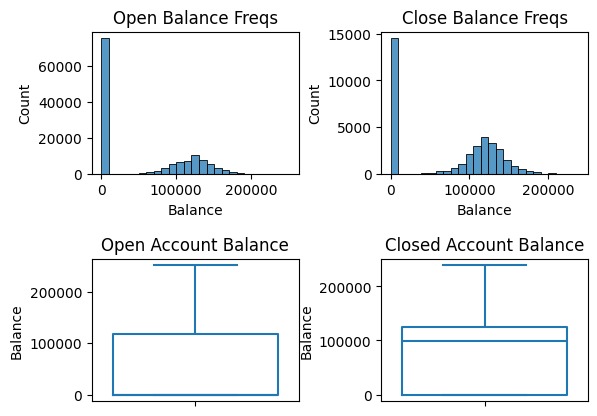

In [12]:
plot_high_expectation_vars(open_bal, close_bal, "Balance", "Balance")

#### Conclusion About Account Balance 
Again, just like credit score, the distributions of the data appears to be the same. The descriptive statistics even offers a reversal of expectations where on average people with more money are closing their accounts. I believe balance may be a misleading variable to include. Based on this data, this variable would have low impact. 

### Analyzing Number of Products

In [13]:
open_num_prods = bank_accnt_open['NumOfProducts']
close_num_prods = bank_accnt_closed['NumOfProducts']

concated_num_prods = pd.concat([open_num_prods, close_num_prods], axis = 1)
concated_num_prods.columns.values[0] = "Open Num Prods"
concated_num_prods.columns.values[1] = "Close Num Prods"

concated_num_prods.describe()

,Open Num Prods,Close Num Prods
count,130113.000000,34921.000000
mean,1.615273,1.327854
std,0.494632,0.661912
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,1.000000
max,4.000000,4.000000


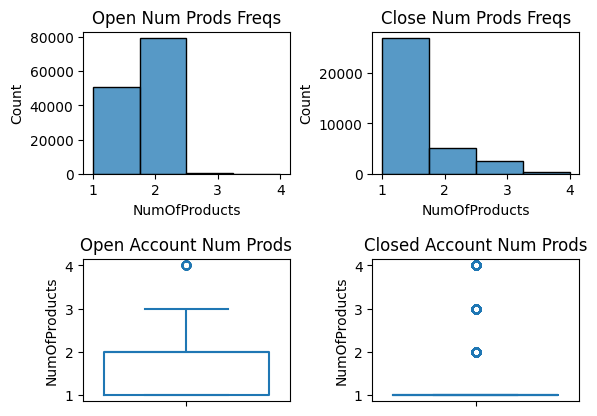

In [14]:
plot_high_expectation_vars(open_num_prods, close_num_prods, "Num Prods", "Num Prods", num_bins=4)

#### Conclusion about Number of Products Variable 
The open histogram and boxplot convey that if someone has more than one product at a bank they are likelier to keep their account open. The vast majority of people who close their accounts are people who only have one product at the bank. Looking at the close boxplot there is really no quartile range, most of the values fall into having 1 product at that bank while 2,3,4 products can be considered fliers. This would be regraded as a variable with moderate impact on the outcome.

### Analyzing is Active Member

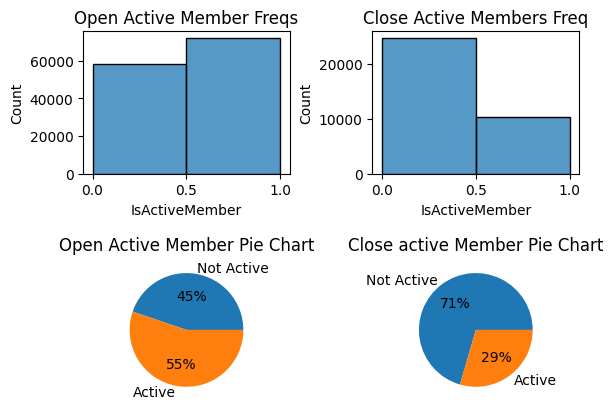

In [30]:
open_active = bank_accnt_open['IsActiveMember']
close_active = bank_accnt_closed['IsActiveMember']

plt.subplot(2,2,1)
sns.histplot(open_active, bins = 2)
plt.title("Open Active Member Freqs")

plt.subplot(2,2,2)
sns.histplot(close_active, bins=2)
plt.title("Close Active Members Freq")

plt.subplot(2,2,3)
plt.pie(open_active.value_counts(sort=False), labels=["Not Active", "Active"], autopct='%.0f%%')
plt.title("Open Active Member Pie Chart")

plt.subplot(2,2,4)
plt.pie(close_active.value_counts(sort=False), labels=["Not Active", "Active"], autopct='%.0f%%')
plt.title("Close active Member Pie Chart")

plt.subplots_adjust(hspace=0.6, wspace=0.4)

plt.show()


#### Conclusion About Active Member 
Although having an active account for members who choose to keep their account open does not a lot of weight, people who are not active on their account is a great predictor of those who choose to close their account. This can be displayed through 71% of people who closed their account were not active while only 29% used their account and closed it. I therefore grade this variable as having moderate impact on the outcome of the account.

## Analysis of Dependent Variable

In [31]:
is_accnt_closed_col = training_df['Exited']
is_accnt_closed_col.describe()

count    165034.000000
mean          0.211599
std           0.408443
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Exited, dtype: float64

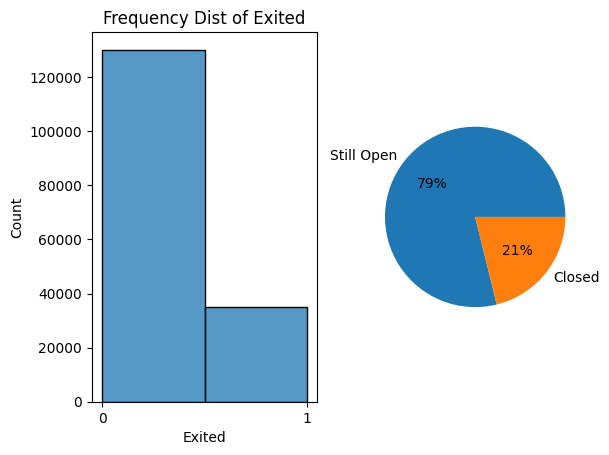

In [49]:
plt.subplot(1,2,1)
sns.histplot(is_accnt_closed_col, bins=2)
plt.xticks([0,1])
plt.title("Frequency Dist of Exited")

plt.subplot(1,2,2)
plt.pie(is_accnt_closed_col.value_counts(), labels=["Still Open", "Closed"], autopct='%.0f%%')
plt.show()

Looking at the distribution of data for people who closed their account versus people who kept their account open, there is a very large class imbalance in the data set as 79% of the data falls into people who kept their account open versus only 21% who closed their account.

### Correlation Between Variable Analysis 
Correlation here is misleading because the Pandas correlation function most likely does not handle binary variables well. Shown below is the correlation heatmap and it does not look good at all. Variables that probably should have correlations such as age and tenure has zero correlation. Instead of this correlation calculations, I will use scipy pointbiserialr which can find the correlation between a continous variable and a binary variable along with Phi Coefficient which can find correlations between two binary variables. For pairs of continous variables, I will continue to use the pandas correlation function.   

<Axes: >

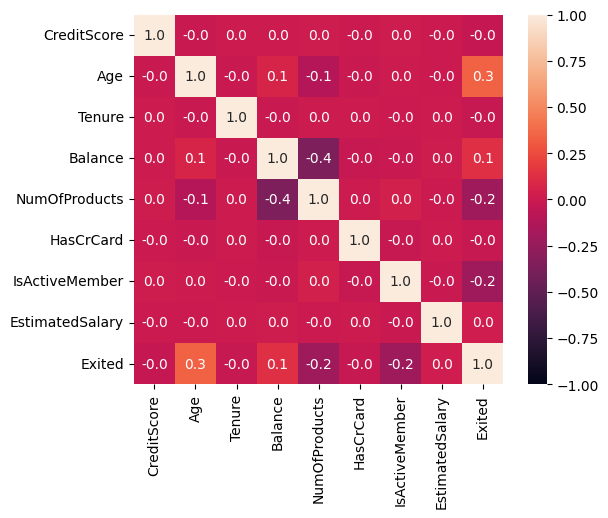

In [68]:
correlation_matrix = training_df.copy()
correlation_matrix.drop(columns=['id', 'CustomerId', 'Surname', 'Geography', 'Gender'], inplace=True)
correlation_matrix = correlation_matrix.corr()

f, ax = plt.subplots()
sns.heatmap(data=correlation_matrix, vmax=1, vmin=-1, annot=True, fmt="0.1f", square=True)


In [79]:
correlation_matrix = training_df.copy()
correlation_matrix.drop(columns=['id', 'CustomerId', 'Surname', 'Geography', 'Gender'], inplace=True)

#i can determine if something is a binary value if there are only two unique values
# concated_num_prods = pd.concat([open_num_prods, close_num_prods], axis = 1)

concated_df = pd.concat([training_df['CreditScore'], training_df['Balance']], axis=1)
print(concated_df.corr())
print(type(concated_df))


             CreditScore   Balance
CreditScore     1.000000  0.006973
Balance         0.006973  1.000000
<class 'pandas.core.frame.DataFrame'>
